In [83]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [173]:
df=pd.read_csv('file:///F:/housePrice.csv')
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [174]:
df.tail()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67
3478,82,2,False,True,True,Parand,3.600000e+08,12000.00


In [175]:
from sklearn.preprocessing import LabelEncoder

In [176]:
la=LabelEncoder()

In [177]:
df['Parking']=la.fit_transform(df['Parking'])
df['Warehouse']=la.fit_transform(df['Warehouse'])
df['Elevator']=la.fit_transform(df['Elevator'])

In [178]:
dummies=pd.get_dummies(df['Address'],drop_first=True)

In [179]:
dummies

,Abbasabad,Absard,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South,Amir Bahador,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3476,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
df=pd.concat([df,dummies],axis='columns')

In [181]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Abbasabad,Absard,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33,0,0,...,0,0,0,0,0,0,0,0,0,0
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33,0,0,...,0,0,0,0,0,0,0,0,0,0
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33,0,0,...,0,0,0,0,0,0,0,0,0,0


In [182]:
print(list(df.columns))

['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price', 'Price(USD)', 'Abbasabad', 'Absard', 'Abuzar', 'Afsarieh', 'Ahang', 'Air force', 'Ajudaniye', 'Alborz Complex', 'Aliabad South', 'Amir Bahador', 'Amirabad', 'Amirieh', 'Andisheh', 'Aqdasieh', 'Araj', 'Argentina', 'Atabak', 'Azadshahr', 'Azarbaijan', 'Azari', 'Baghestan', 'Bahar', 'Baqershahr', 'Beryanak', 'Boloorsazi', 'Central Janatabad', 'Chahardangeh', 'Chardangeh', 'Chardivari', 'Chidz', 'Damavand', 'Darabad', 'Darakeh', 'Darband', 'Daryan No', 'Dehkade Olampic', 'Dezashib', 'Dolatabad', 'Dorous', 'East Ferdows Boulevard', 'East Pars', 'Ekbatan', 'Ekhtiarieh', 'Elahieh', 'Elm-o-Sanat', 'Enghelab', 'Eram', 'Eskandari', 'Fallah', 'Farmanieh', 'Fatemi', 'Feiz Garden', 'Firoozkooh', 'Firoozkooh Kuhsar', 'Gandhi', 'Garden of Saba', 'Gheitarieh', 'Ghiyamdasht', 'Ghoba', 'Gholhak', 'Gisha', 'Golestan', 'Haft Tir', 'Hakimiyeh', 'Hashemi', 'Hassan Abad', 'Hekmat', 'Heravi', 'Heshmatieh', 'Hor Square', 'Islamshahr', 'Is

In [183]:
df=df.drop(['Address', 'Absard', 'Abuzar', 'Afsarieh', 'Ahang', 'Air force', 'Ajudaniye', 'Alborz Complex', 'Aliabad South', 'Amir Bahador', 'Amirabad', 'Amirieh', 'Andisheh', 'Aqdasieh', 'Araj', 'Argentina', 'Atabak', 'Azadshahr', 'Azarbaijan', 'Azari', 'Baghestan', 'Bahar', 'Baqershahr', 'Beryanak', 'Boloorsazi', 'Central Janatabad', 'Chahardangeh', 'Chardangeh', 'Chardivari', 'Chidz', 'Damavand', 'Darabad', 'Darakeh', 'Darband', 'Daryan No', 'Dehkade Olampic', 'Dezashib', 'Dolatabad', 'Dorous', 'East Ferdows Boulevard', 'East Pars', 'Ekbatan', 'Ekhtiarieh', 'Elahieh', 'Elm-o-Sanat', 'Enghelab', 'Eram', 'Eskandari', 'Fallah', 'Farmanieh', 'Fatemi', 'Feiz Garden', 'Firoozkooh', 'Firoozkooh Kuhsar', 'Gandhi', 'Garden of Saba', 'Gheitarieh', 'Ghiyamdasht', 'Ghoba', 'Gholhak', 'Gisha', 'Golestan', 'Haft Tir', 'Hakimiyeh', 'Hashemi', 'Hassan Abad', 'Hekmat', 'Heravi', 'Heshmatieh', 'Hor Square', 'Islamshahr', 'Islamshahr Elahieh', 'Javadiyeh', 'Jeyhoon', 'Jordan', 'Kahrizak', 'Kamranieh', 'Karimkhan', 'Karoon', 'Kazemabad', 'Keshavarz Boulevard', 'Khademabad Garden', 'Khavaran', 'Komeil', 'Koohsar', 'Kook', 'Lavasan', 'Lavizan', 'Mahallati', 'Mahmoudieh', 'Majidieh', 'Malard', 'Marzdaran', 'Mehrabad', 'Mehrabad River River', 'Mehran', 'Mirdamad', 'Mirza Shirazi', 'Moniriyeh', 'Narmak', 'Nasim Shahr', 'Nawab', 'Naziabad', 'Nezamabad', 'Niavaran', 'North Program Organization', 'Northern Chitgar', 'Northern Janatabad', 'Northern Suhrawardi', 'Northren Jamalzadeh', 'Ostad Moein', 'Ozgol', 'Pakdasht', 'Pakdasht KhatunAbad', 'Parand', 'Parastar', 'Pardis', 'Pasdaran', 'Persian Gulf Martyrs Lake', 'Pirouzi', 'Pishva', 'Punak', 'Qalandari', 'Qarchak', 'Qasr-od-Dasht', 'Qazvin Imamzadeh Hassan', 'Railway', 'Ray', 'Ray - Montazeri', 'Ray - Pilgosh', 'Razi', 'Republic', 'Robat Karim', 'Rudhen', 'Saadat Abad', 'SabaShahr', 'Sabalan', 'Sadeghieh', 'Safadasht', 'Salehabad', 'Salsabil', 'Sattarkhan', 'Seyed Khandan', 'Shadabad', 'Shahedshahr', 'Shahr-e-Ziba', 'ShahrAra', 'Shahrake Apadana', 'Shahrake Azadi', 'Shahrake Gharb', 'Shahrake Madaen', 'Shahrake Qods', 'Shahrake Quds', 'Shahrake Shahid Bagheri', 'Shahrakeh Naft', 'Shahran', 'Shahryar', 'Shams Abad', 'Shoosh', 'Si Metri Ji', 'Sohanak', 'Southern Chitgar', 'Southern Janatabad', 'Southern Program Organization', 'Southern Suhrawardi', 'Tajrish', 'Tarasht', 'Taslihat', 'Tehran Now', 'Tehransar', 'Telecommunication', 'Tenant', 'Thirteen November', 'Vahidieh', 'Vahidiyeh', 'Valiasr', 'Vanak', 'Varamin - Beheshti', 'Velenjak', 'Villa', 'Water Organization', 'Waterfall', 'West Ferdows Boulevard', 'West Pars', 'Yaftabad', 'Yakhchiabad', 'Yousef Abad', 'Zafar', 'Zaferanieh', 'Zargandeh', 'Zibadasht'],axis='columns')

In [184]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD),Abbasabad
0,63,1,1,1,1,1.850000e+09,61666.67,0
1,60,1,1,1,1,1.850000e+09,61666.67,0
2,79,2,1,1,1,5.500000e+08,18333.33,0
3,95,2,1,1,1,9.025000e+08,30083.33,0
4,123,2,1,1,1,7.000000e+09,233333.33,0


In [185]:
df=df.rename({'Abbasabad':'Address'},axis='columns')

In [186]:
df=df.rename({'Price(USD)':'Cost'},axis='columns')

In [187]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Price,Cost,Address
0,63,1,1,1,1,1.850000e+09,61666.67,0
1,60,1,1,1,1,1.850000e+09,61666.67,0
2,79,2,1,1,1,5.500000e+08,18333.33,0
3,95,2,1,1,1,9.025000e+08,30083.33,0
4,123,2,1,1,1,7.000000e+09,233333.33,0


In [188]:
df.shape

(3479, 8)

In [189]:
df.dtypes

Area           int64
Room           int64
Parking        int64
Warehouse      int64
Elevator       int64
Price        float64
Cost         float64
Address        uint8
dtype: object

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area       3479 non-null   int64  
 1   Room       3479 non-null   int64  
 2   Parking    3479 non-null   int64  
 3   Warehouse  3479 non-null   int64  
 4   Elevator   3479 non-null   int64  
 5   Price      3479 non-null   float64
 6   Cost       3479 non-null   float64
 7   Address    3479 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 193.8 KB


In [191]:
df.describe()

,Area,Room,Parking,Warehouse,Elevator,Price,Cost,Address
count,3.479000e+03,3479.000000,3479.000000,3479.000000,3479.000000,3.479000e+03,3.479000e+03,3479.000000
mean,8.744000e+06,2.079908,0.847945,0.914631,0.787295,5.359023e+09,1.786341e+05,0.000575
std,3.167266e+08,0.758275,0.359126,0.279471,0.409279,8.099935e+09,2.699978e+05,0.023973
min,3.000000e+01,0.000000,0.000000,0.000000,0.000000,3.600000e+06,1.200000e+02,0.000000
25%,6.900000e+01,2.000000,1.000000,1.000000,1.000000,1.418250e+09,4.727500e+04,0.000000
50%,9.000000e+01,2.000000,1.000000,1.000000,1.000000,2.900000e+09,9.666667e+04,0.000000
75%,1.200000e+02,2.000000,1.000000,1.000000,1.000000,6.000000e+09,2.000000e+05,0.000000
max,1.616000e+10,5.000000,1.000000,1.000000,1.000000,9.240000e+10,3.080000e+06,1.000000


In [192]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Area,8.0,0.136568,0.348952,-0.000662,0.010878,0.015394,0.021144,1.0
Room,8.0,0.339994,0.347621,-0.018345,0.101525,0.228256,0.567732,1.0
Parking,8.0,0.317529,0.319411,0.010156,0.145487,0.232445,0.431498,1.0
Warehouse,8.0,0.249960,0.331465,0.007327,0.084134,0.119627,0.260410,1.0
Elevator,8.0,0.258235,0.327769,0.012466,0.087173,0.146577,0.260204,1.0
Price,8.0,0.374184,0.424805,-0.006305,0.087311,0.150766,0.675799,1.0
Cost,8.0,0.374184,0.424805,-0.006305,0.087311,0.150766,0.675799,1.0
Address,8.0,0.124792,0.353785,-0.018345,-0.006305,0.003333,0.010734,1.0


In [193]:
df.isnull().sum()

Area         0
Room         0
Parking      0
Warehouse    0
Elevator     0
Price        0
Cost         0
Address      0
dtype: int64

In [194]:
df.min()

Area              30.0
Room               0.0
Parking            0.0
Warehouse          0.0
Elevator           0.0
Price        3600000.0
Cost             120.0
Address            0.0
dtype: float64

In [195]:
df.mean()

Area         8.744000e+06
Room         2.079908e+00
Parking      8.479448e-01
Warehouse    9.146306e-01
Elevator     7.872952e-01
Price        5.359023e+09
Cost         1.786341e+05
Address      5.748778e-04
dtype: float64

In [196]:
df.max()

Area         1.616000e+10
Room         5.000000e+00
Parking      1.000000e+00
Warehouse    1.000000e+00
Elevator     1.000000e+00
Price        9.240000e+10
Cost         3.080000e+06
Address      1.000000e+00
dtype: float64

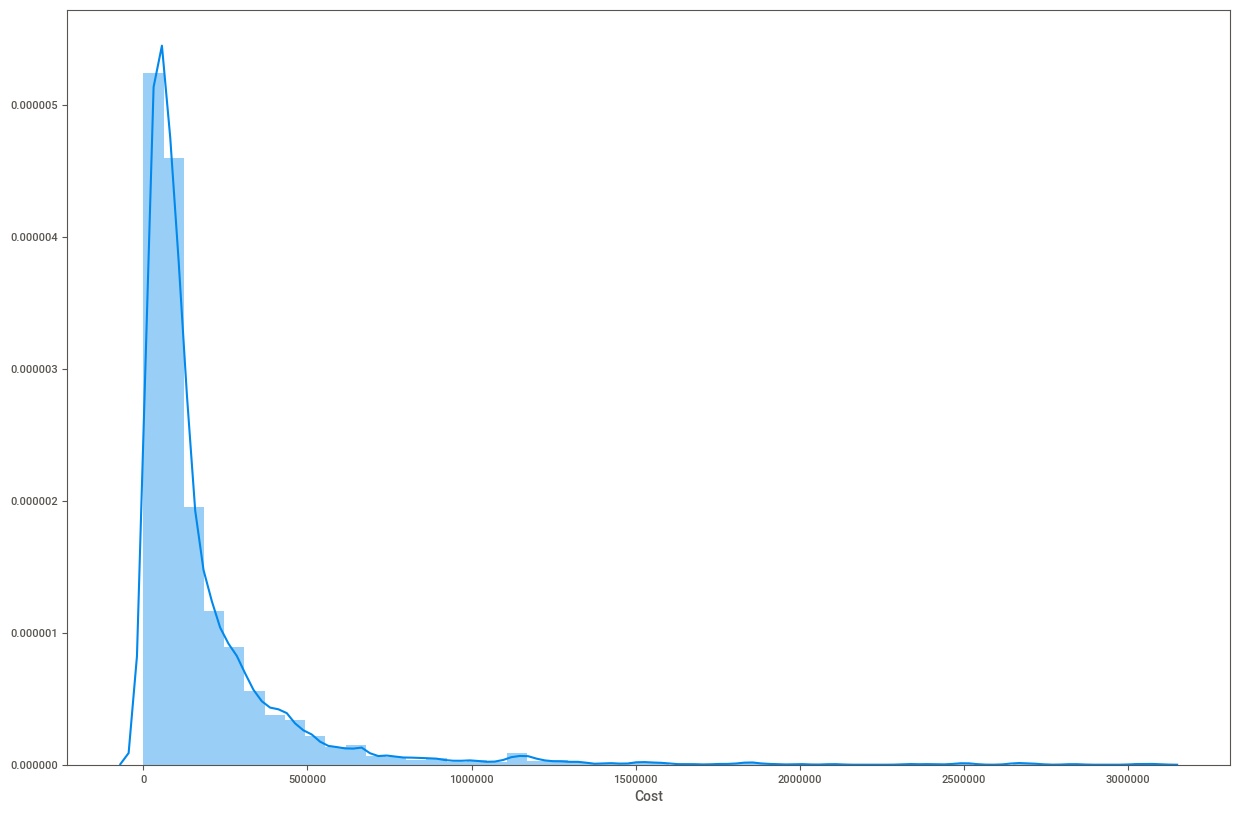

In [197]:
plt.figure(figsize=(15,10))
sns.distplot(df['Cost'])

In [198]:
mean_value_weight=df['Cost'].mean()
mean_value_weight

178634.09040528862

In [199]:
std_value_weight=df['Cost'].std()
std_value_weight

269997.817408084

In [200]:
std_3=mean_value_weight+(3*std_value_weight)
std_3

988627.5426295407

In [201]:
std_3=mean_value_weight-(3*std_value_weight)
std_3

-631359.3618189634

In [202]:
df[df['Cost']<std_3]

,Area,Room,Parking,Warehouse,Elevator,Price,Cost,Address


In [203]:
df[df['Cost']>std_3]

,Area,Room,Parking,Warehouse,Elevator,Price,Cost,Address
0,63,1,1,1,1,1.850000e+09,61666.67,0
1,60,1,1,1,1,1.850000e+09,61666.67,0
2,79,2,1,1,1,5.500000e+08,18333.33,0
3,95,2,1,1,1,9.025000e+08,30083.33,0
4,123,2,1,1,1,7.000000e+09,233333.33,0
...,...,...,...,...,...,...,...,...
3474,86,2,1,1,1,3.500000e+09,116666.67,0
3475,83,2,1,1,1,6.800000e+09,226666.67,0
3476,75,2,0,0,0,3.650000e+08,12166.67,0
3477,105,2,1,1,1,5.600000e+09,186666.67,0


In [204]:
marge1=df[(df['Cost']>std_3) | (df['Cost']<std_3)]

In [205]:
remove_marge1=df[(df['Cost']>std_3) & (df['Cost']<std_3)]

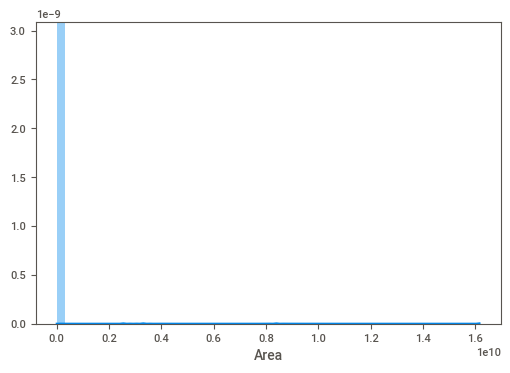

In [206]:
sns.distplot(df['Area'])

In [207]:
df=df.drop(['Price'],axis='columns')

In [208]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Cost', 'Address'], dtype='object')

In [209]:
x=df.drop(['Cost'],axis='columns')

In [210]:
y=df.Cost.values

In [211]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=20)

In [212]:
from sklearn.metrics import mean_squared_error,r2_score

In [213]:
li=LinearRegression()
li.fit(xtrain,ytrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
li.score(xtest,ytest)*100

28.07636332782989

In [215]:
pred=li.predict(xtest)
pred

array([172352.2715255 , 172352.27131941, 172352.27139435, ...,
       380227.72295139, 380227.72285771, -35523.18044371])

In [216]:
mean_squared_error(ytest,pred)

42574267154.85488

In [217]:
r2_score(ytest,pred)

0.2807636332782989

In [218]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Cost,Address
0,63,1,1,1,1,61666.67,0
1,60,1,1,1,1,61666.67,0
2,79,2,1,1,1,18333.33,0
3,95,2,1,1,1,30083.33,0
4,123,2,1,1,1,233333.33,0


In [219]:
from sklearn.neighbors import KNeighborsRegressor

In [220]:
knn=KNeighborsRegressor(n_neighbors=50)

In [221]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

In [222]:
knn.score(xtest,ytest)*100

57.9946005726202

In [223]:
pred2=knn.predict(xtest)
pred2

array([104739.4002,  99147.333 , 141330.0008, ..., 240048.0002,
       287780.667 ,  67707.3328])

In [224]:
mean_squared_error(ytest,pred2)

24864553294.475353

In [225]:
r2_score(ytest,pred2)

0.579946005726202

In [226]:
from catboost import CatBoostRegressor

In [138]:
cat=CatBoostRegressor()
cat.fit(xtrain,ytrain)
pred_cat=cat.predict(xtest)
accu_cat=accuracy_score(ytest,pred_cat)*100
accu_cat

Learning rate set to 0.04573
0:	learn: 272794.3326115	total: 2.53ms	remaining: 2.53s
1:	learn: 265347.7444887	total: 4.94ms	remaining: 2.46s
2:	learn: 258262.5479306	total: 7.37ms	remaining: 2.45s
3:	learn: 251721.8414288	total: 9.55ms	remaining: 2.38s
4:	learn: 245561.3174460	total: 11.8ms	remaining: 2.34s
5:	learn: 239619.9559191	total: 13.9ms	remaining: 2.31s
6:	learn: 233961.8352210	total: 16.1ms	remaining: 2.28s
7:	learn: 228513.6857295	total: 18.3ms	remaining: 2.27s
8:	learn: 223645.7818475	total: 20.9ms	remaining: 2.3s
9:	learn: 219039.1431115	total: 23.1ms	remaining: 2.29s
10:	learn: 214503.0811644	total: 25.6ms	remaining: 2.3s
11:	learn: 210071.8944022	total: 27.8ms	remaining: 2.29s
12:	learn: 206057.1828869	total: 30.1ms	remaining: 2.28s
13:	learn: 202316.8030246	total: 32.4ms	remaining: 2.28s
14:	learn: 198517.1404407	total: 34.8ms	remaining: 2.29s
15:	learn: 195068.9834632	total: 37.3ms	remaining: 2.29s
16:	learn: 191806.6883268	total: 39.9ms	remaining: 2.31s
17:	learn: 189

214:	learn: 120574.1901140	total: 480ms	remaining: 1.75s
215:	learn: 120494.1296876	total: 482ms	remaining: 1.75s
216:	learn: 120444.2208065	total: 483ms	remaining: 1.74s
217:	learn: 120413.2730728	total: 485ms	remaining: 1.74s
218:	learn: 120315.2978942	total: 487ms	remaining: 1.74s
219:	learn: 120221.4257314	total: 489ms	remaining: 1.73s
220:	learn: 120129.4462540	total: 491ms	remaining: 1.73s
221:	learn: 120026.3120089	total: 493ms	remaining: 1.73s
222:	learn: 119980.0219263	total: 495ms	remaining: 1.72s
223:	learn: 119881.0093933	total: 497ms	remaining: 1.72s
224:	learn: 119810.0589971	total: 499ms	remaining: 1.72s
225:	learn: 119734.6907044	total: 500ms	remaining: 1.71s
226:	learn: 119647.6330497	total: 503ms	remaining: 1.71s
227:	learn: 119567.1680696	total: 505ms	remaining: 1.71s
228:	learn: 119490.0291953	total: 507ms	remaining: 1.71s
229:	learn: 119416.0639265	total: 510ms	remaining: 1.71s
230:	learn: 119332.7357103	total: 512ms	remaining: 1.71s
231:	learn: 119260.3752424	tota

358:	learn: 112705.0271904	total: 799ms	remaining: 1.43s
359:	learn: 112679.1409037	total: 801ms	remaining: 1.42s
360:	learn: 112583.4279876	total: 804ms	remaining: 1.42s
361:	learn: 112558.4083253	total: 806ms	remaining: 1.42s
362:	learn: 112511.4759727	total: 809ms	remaining: 1.42s
363:	learn: 112468.4331955	total: 811ms	remaining: 1.42s
364:	learn: 112444.5871609	total: 816ms	remaining: 1.42s
365:	learn: 112421.3436522	total: 818ms	remaining: 1.42s
366:	learn: 112305.0259150	total: 820ms	remaining: 1.41s
367:	learn: 112215.0342016	total: 823ms	remaining: 1.41s
368:	learn: 112129.2946105	total: 826ms	remaining: 1.41s
369:	learn: 112079.0556006	total: 828ms	remaining: 1.41s
370:	learn: 112038.0143219	total: 830ms	remaining: 1.41s
371:	learn: 111956.2825590	total: 833ms	remaining: 1.41s
372:	learn: 111912.9551324	total: 835ms	remaining: 1.4s
373:	learn: 111870.7643723	total: 838ms	remaining: 1.4s
374:	learn: 111829.6773485	total: 840ms	remaining: 1.4s
375:	learn: 111806.6455878	total: 

550:	learn: 106759.0732581	total: 1.27s	remaining: 1.03s
551:	learn: 106742.5844954	total: 1.27s	remaining: 1.03s
552:	learn: 106736.2554919	total: 1.27s	remaining: 1.03s
553:	learn: 106718.9399986	total: 1.28s	remaining: 1.03s
554:	learn: 106710.5406274	total: 1.28s	remaining: 1.03s
555:	learn: 106704.5237322	total: 1.28s	remaining: 1.02s
556:	learn: 106695.0947530	total: 1.28s	remaining: 1.02s
557:	learn: 106673.0287622	total: 1.29s	remaining: 1.02s
558:	learn: 106651.6438702	total: 1.29s	remaining: 1.02s
559:	learn: 106635.6181964	total: 1.29s	remaining: 1.02s
560:	learn: 106620.1210415	total: 1.29s	remaining: 1.01s
561:	learn: 106584.5243281	total: 1.3s	remaining: 1.01s
562:	learn: 106569.2332139	total: 1.3s	remaining: 1.01s
563:	learn: 106525.7351045	total: 1.3s	remaining: 1.01s
564:	learn: 106510.7079810	total: 1.3s	remaining: 1s
565:	learn: 106496.0580007	total: 1.31s	remaining: 1s
566:	learn: 106481.5516270	total: 1.31s	remaining: 1s
567:	learn: 106464.9859467	total: 1.31s	rema

754:	learn: 103755.2590592	total: 1.75s	remaining: 566ms
755:	learn: 103748.3096420	total: 1.75s	remaining: 564ms
756:	learn: 103728.9214708	total: 1.75s	remaining: 562ms
757:	learn: 103720.7679335	total: 1.75s	remaining: 559ms
758:	learn: 103702.3013244	total: 1.75s	remaining: 557ms
759:	learn: 103693.9022566	total: 1.76s	remaining: 555ms
760:	learn: 103680.4481879	total: 1.76s	remaining: 552ms
761:	learn: 103671.0691482	total: 1.76s	remaining: 550ms
762:	learn: 103658.5305990	total: 1.76s	remaining: 548ms
763:	learn: 103641.3932043	total: 1.76s	remaining: 545ms
764:	learn: 103626.1276038	total: 1.77s	remaining: 543ms
765:	learn: 103602.4854377	total: 1.77s	remaining: 541ms
766:	learn: 103577.8979827	total: 1.77s	remaining: 538ms
767:	learn: 103569.6556819	total: 1.77s	remaining: 536ms
768:	learn: 103563.6381125	total: 1.78s	remaining: 534ms
769:	learn: 103549.1401146	total: 1.78s	remaining: 531ms
770:	learn: 103544.3585265	total: 1.78s	remaining: 529ms
771:	learn: 103542.7012121	tota

949:	learn: 101758.7566651	total: 2.21s	remaining: 116ms
950:	learn: 101736.0527846	total: 2.21s	remaining: 114ms
951:	learn: 101705.1961239	total: 2.22s	remaining: 112ms
952:	learn: 101698.8621260	total: 2.22s	remaining: 109ms
953:	learn: 101697.7552894	total: 2.22s	remaining: 107ms
954:	learn: 101695.8451744	total: 2.22s	remaining: 105ms
955:	learn: 101688.1249947	total: 2.23s	remaining: 102ms
956:	learn: 101683.8063485	total: 2.23s	remaining: 100ms
957:	learn: 101678.5033724	total: 2.23s	remaining: 97.8ms
958:	learn: 101674.3520984	total: 2.23s	remaining: 95.5ms
959:	learn: 101672.1498586	total: 2.23s	remaining: 93.1ms
960:	learn: 101669.1925732	total: 2.24s	remaining: 90.8ms
961:	learn: 101658.4143681	total: 2.24s	remaining: 88.5ms
962:	learn: 101653.7234895	total: 2.24s	remaining: 86.1ms
963:	learn: 101638.7655428	total: 2.24s	remaining: 83.8ms
964:	learn: 101634.7894089	total: 2.25s	remaining: 81.5ms
965:	learn: 101625.3455997	total: 2.25s	remaining: 79.2ms
966:	learn: 101623.073

ValueError: continuous is not supported

In [227]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Cost,Address
0,63,1,1,1,1,61666.67,0
1,60,1,1,1,1,61666.67,0
2,79,2,1,1,1,18333.33,0
3,95,2,1,1,1,30083.33,0
4,123,2,1,1,1,233333.33,0


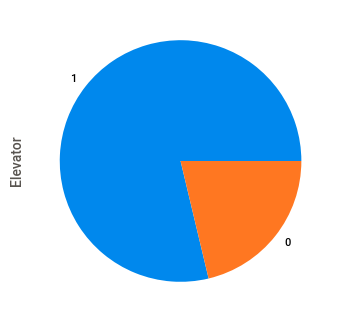

In [228]:
df.Elevator.value_counts().plot(kind='pie')

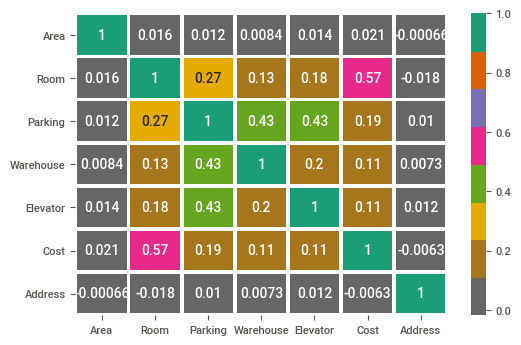

In [229]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

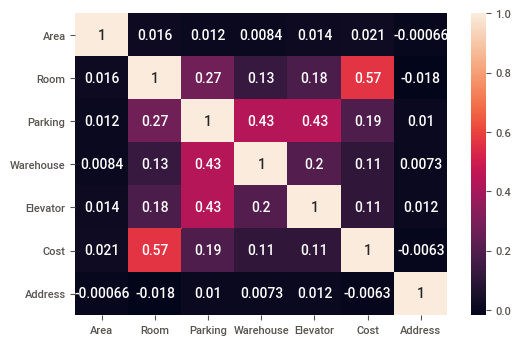

In [230]:
sns.heatmap(df.corr(),annot=True)

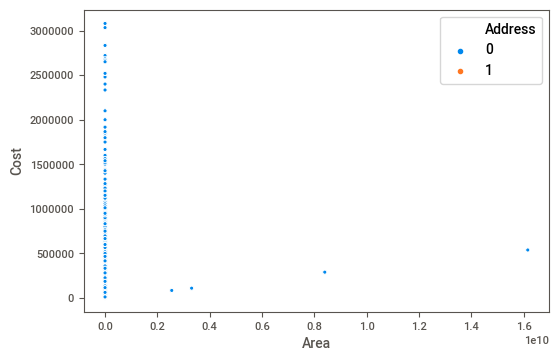

In [231]:
sns.scatterplot(x='Area',y='Cost',data=df,color='red',hue='Address')

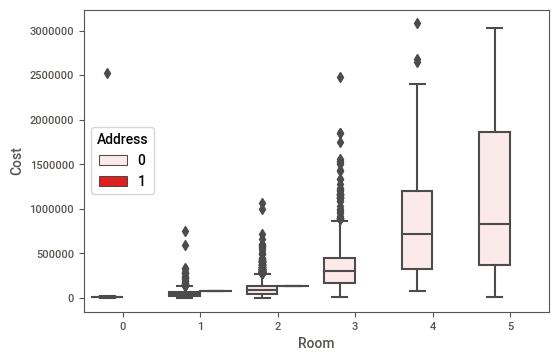

In [232]:
sns.boxplot(x='Room',y='Cost',data=df,color='red',hue='Address')

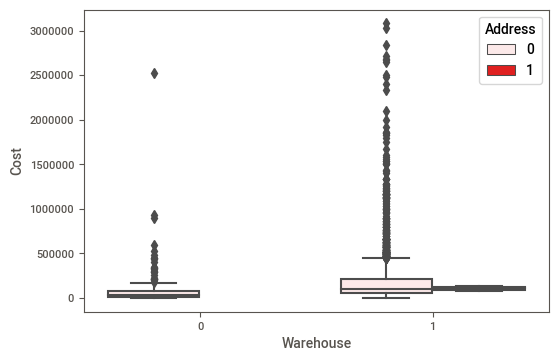

In [233]:
sns.boxplot(x='Warehouse',y='Cost',data=df,color='red',hue='Address')

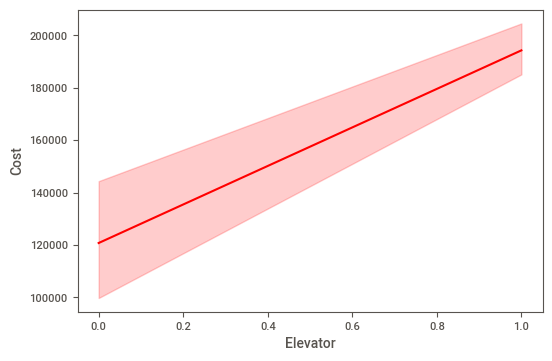

In [234]:
sns.lineplot(x='Elevator', y='Cost',data=df,color="red")

In [236]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Cost', 'Address'], dtype='object')

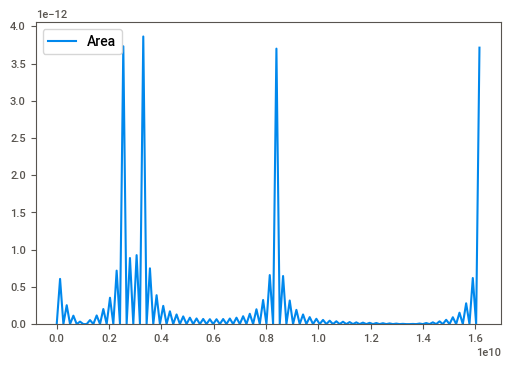

In [237]:
sns.kdeplot(df['Area'])

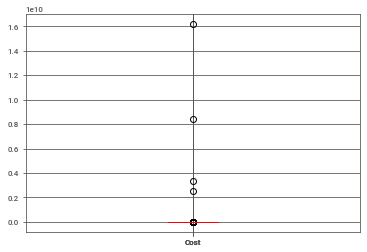

In [154]:
df.boxplot(column="Area")
df.boxplot(column="Room",color='orange')
df.boxplot(column="Cost",color='red')

In [155]:
import sweetviz as sv

In [156]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [157]:
from IPython.display import IFrame

In [158]:
IFrame(src='Analyze.html',width=1000,height=600)

In [239]:
df.head()

,Area,Room,Parking,Warehouse,Elevator,Cost,Address
0,63,1,1,1,1,61666.67,0
1,60,1,1,1,1,61666.67,0
2,79,2,1,1,1,18333.33,0
3,95,2,1,1,1,30083.33,0
4,123,2,1,1,1,233333.33,0


In [240]:
a=df.Area.values
b=df.Cost.values

In [241]:
atrain,atest,btrain,btest=train_test_split(a,b,test_size=0.3,random_state=20)

In [242]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
reg.score(xtest,ytest)*100

28.07636332782989

In [244]:
reg2=KNeighborsRegressor()
reg2.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [245]:
reg2.score(xtest,ytest)*100

55.692432129949275

In [246]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [247]:
man=MinMaxScaler()
feat=['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Cost', 'Address']
df[feat]=man.fit_transform(df[feat])
df[feat]

,Area,Room,Parking,Warehouse,Elevator,Cost,Address
0,2.042079e-09,0.2,1.0,1.0,1.0,0.019983,0.0
1,1.856436e-09,0.2,1.0,1.0,1.0,0.019983,0.0
2,3.032178e-09,0.4,1.0,1.0,1.0,0.005914,0.0
3,4.022277e-09,0.4,1.0,1.0,1.0,0.009729,0.0
4,5.754951e-09,0.4,1.0,1.0,1.0,0.075722,0.0
...,...,...,...,...,...,...,...
3474,3.465347e-09,0.4,1.0,1.0,1.0,0.037841,0.0
3475,3.279703e-09,0.4,1.0,1.0,1.0,0.073557,0.0
3476,2.784653e-09,0.4,0.0,0.0,0.0,0.003911,0.0
3477,4.641089e-09,0.4,1.0,1.0,1.0,0.060569,0.0


In [248]:
std=StandardScaler()
feat=['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Cost', 'Address']
df[feat]=std.fit_transform(df[feat])
df[feat]

,Area,Room,Parking,Warehouse,Elevator,Cost,Address
0,-0.027611,-1.424368,0.423464,0.305512,0.51978,-0.433278,-0.023984
1,-0.027611,-1.424368,0.423464,0.305512,0.51978,-0.433278,-0.023984
2,-0.027611,-0.105396,0.423464,0.305512,0.51978,-0.593797,-0.023984
3,-0.027611,-0.105396,0.423464,0.305512,0.51978,-0.550272,-0.023984
4,-0.027611,-0.105396,0.423464,0.305512,0.51978,0.202621,-0.023984
...,...,...,...,...,...,...,...
3474,-0.027611,-0.105396,0.423464,0.305512,0.51978,-0.229544,-0.023984
3475,-0.027611,-0.105396,0.423464,0.305512,0.51978,0.177925,-0.023984
3476,-0.027611,-0.105396,-2.361474,-3.273195,-1.92389,-0.616640,-0.023984
3477,-0.027611,-0.105396,0.423464,0.305512,0.51978,0.029755,-0.023984


In [ ]:
df.hist()